In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [3]:
cd = pd.read_csv("C:/Users/adity/Downloads/Latest-Covid-19-India-Status.csv")

In [28]:
cd.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [5]:
cd.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [29]:
cd.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


In [24]:
cd[cd['Deaths'] == cd['Deaths'].min()]

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
State/UTs,,,,,,,,
Dadra and Nagar Haveli and Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578


In [6]:
cd[cd['Active']== cd['Active'].max()]

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
27,Punjab,793644,1233,773073,19338,0.16,97.41,2.44,34698876


In [30]:
cd[['State/UTs','Deaths']].sort_values(by='Deaths',ascending=False)[:10]

,State/UTs,Deaths
20,Maharashtra,148558
16,Kerala,72042
15,Karnataka,40358
30,Tamil Nadu,38081
8,Delhi,26666
33,Uttar Pradesh,23712
35,West Bengal,21555
27,Punjab,19338
1,Andhra Pradesh,14733
6,Chhattisgarh,14190


In [33]:
cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)[:10]

,State/UTs,Active
27,Punjab,1233
20,Maharashtra,214
35,West Bengal,135
25,Odisha,59
33,Uttar Pradesh,57
11,Haryana,27
16,Kerala,18
8,Delhi,14
15,Karnataka,12
31,Telengana,8


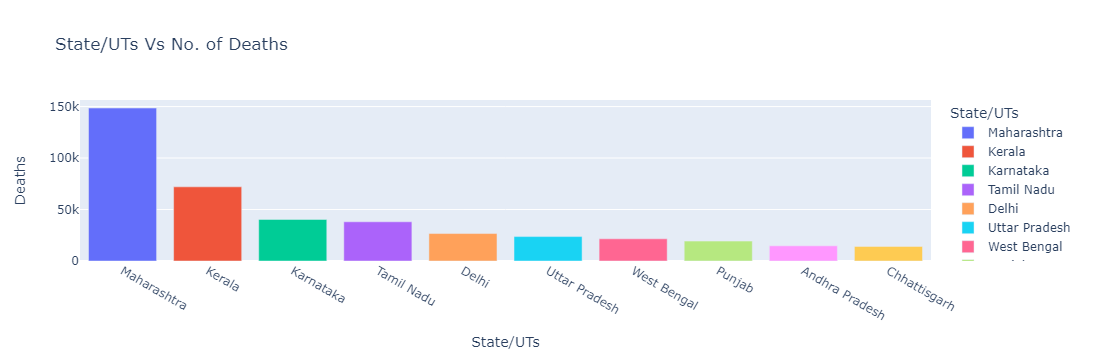

In [32]:
x = cd[['State/UTs','Deaths']].sort_values(by='Deaths',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Deaths']].sort_values(by='Deaths',ascending=False)['Deaths'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Deaths':y})
fig = px.bar(df,
             x='State/UTs',
             y='Deaths',
             color='State/UTs',
             title='State/UTs Vs No. of Deaths')
fig.show()

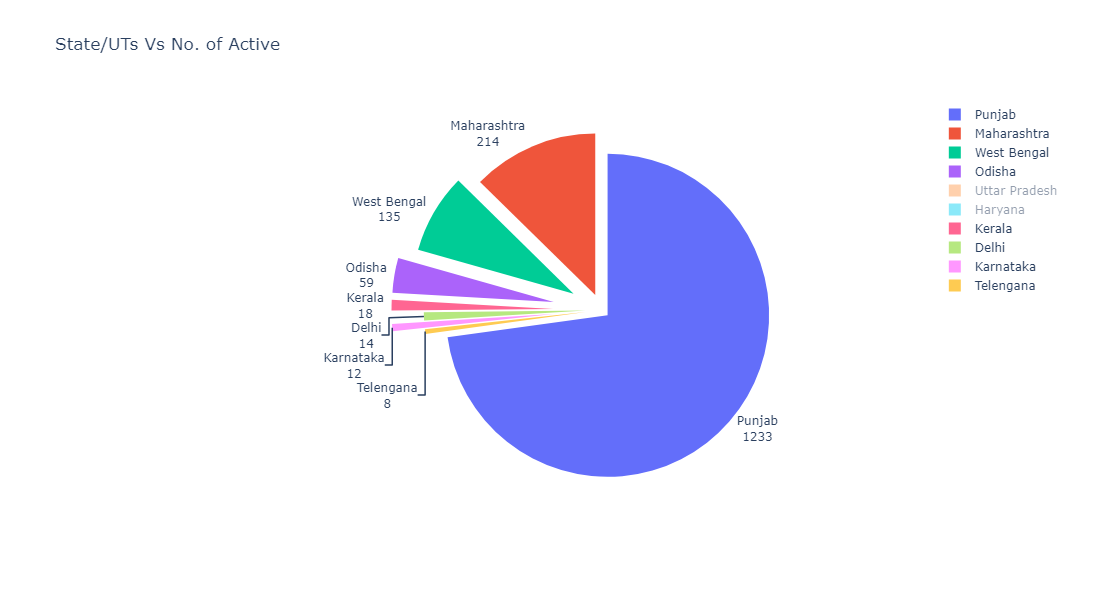

In [38]:
x = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['Active'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Active':y})
fig = px.pie(df,
             names='State/UTs',
             values='Active',
             color='State/UTs',
             title='State/UTs Vs No. of Active',
             hole=0,
             height=600,
             width=600)
fig.update_traces(textposition='outside',textinfo='value+label',pull=[0.05,.1,.2,.3,.1,.2,.3,.1,.3,.1])
fig.show()

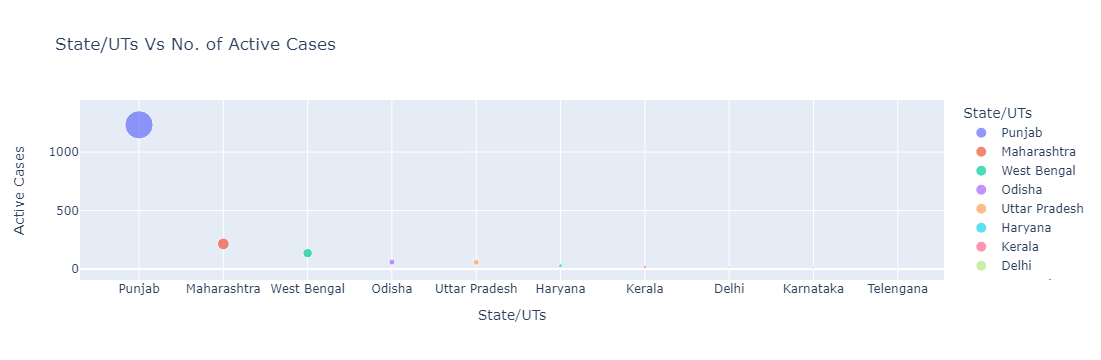

In [40]:
x = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['Active'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Active Cases':y})
fig = px.scatter(df,
             x='State/UTs',
             y='Active Cases',
             color='State/UTs',
             title='State/UTs Vs No. of Active Cases',
             size='Active Cases')
fig.show()

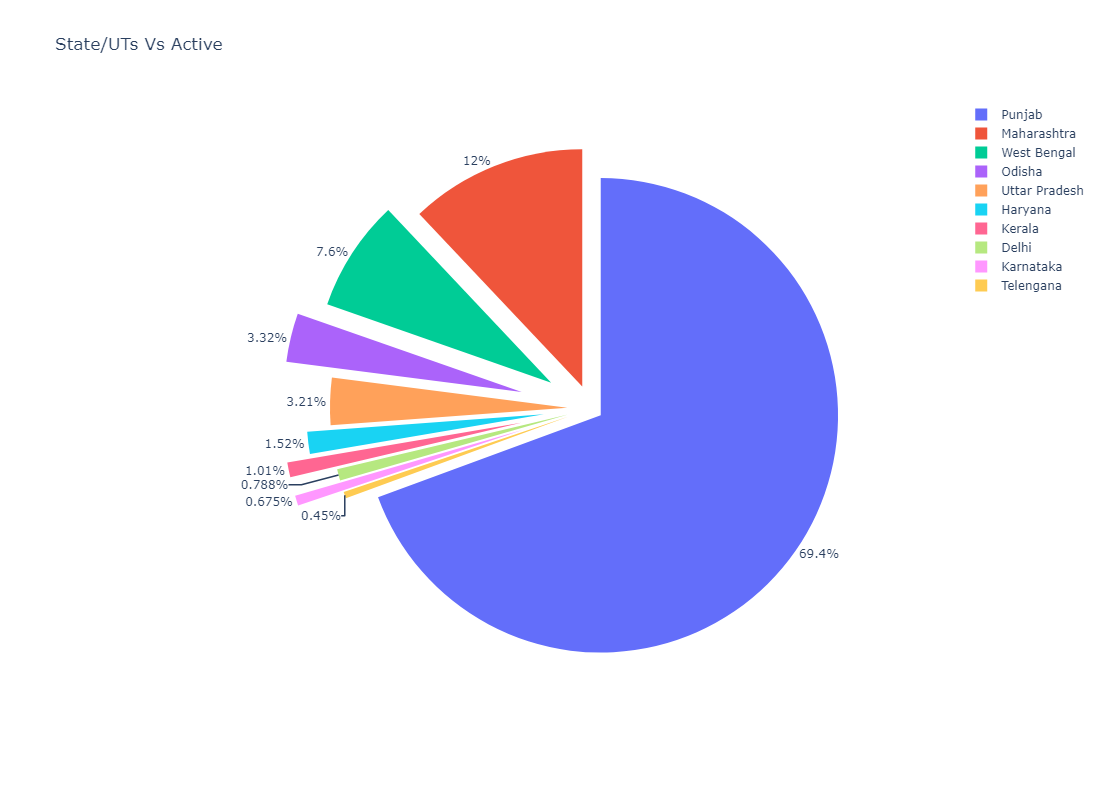

In [42]:
x = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Active']].sort_values(by='Active',ascending=False)['Active'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Active':y})
fig = px.pie(df,
             names='State/UTs',
             values='Active',
             color='State/UTs',
             title='State/UTs Vs Active',
             height=800,
             width=800)
fig.update_traces(textposition='outside',pull=[0.05,.1,.2,.3,.1,.2,.3,.1,.3,.1])
fig.show()

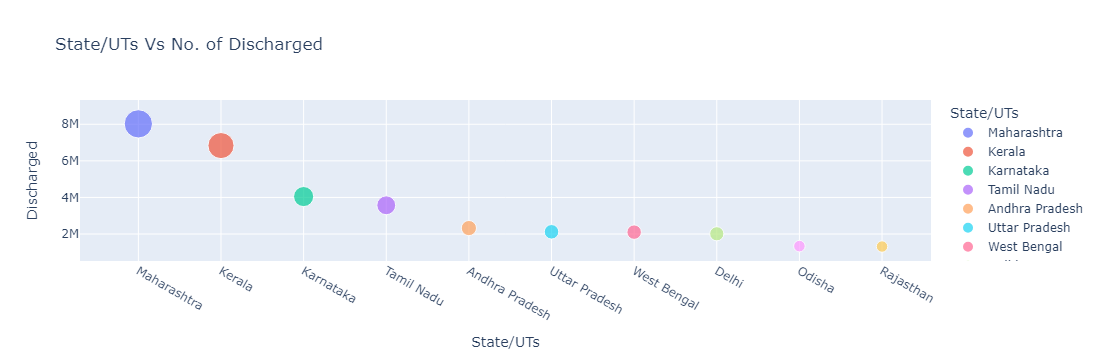

In [43]:
x = cd[['State/UTs','Discharged']].sort_values(by='Discharged',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Discharged']].sort_values(by='Discharged',ascending=False)['Discharged'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Discharged':y})
fig = px.scatter(df,
             x='State/UTs',
             y='Discharged',
             color='State/UTs',
             title='State/UTs Vs No. of Discharged',
             size='Discharged')
fig.show()

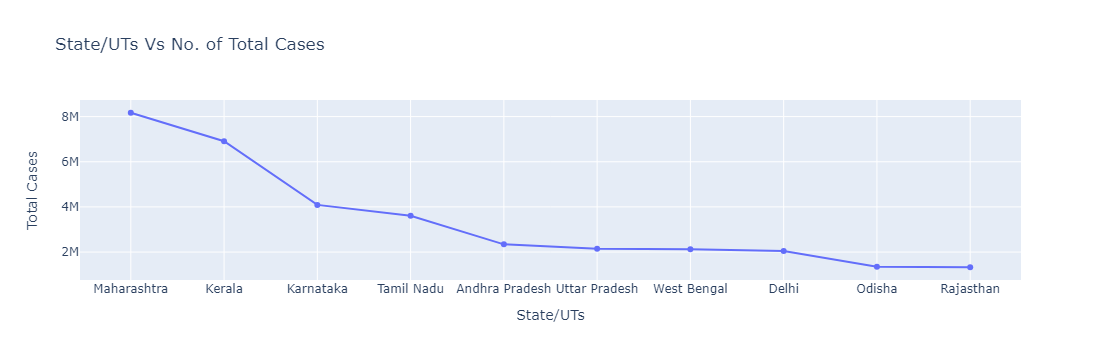

In [47]:
x = cd[['State/UTs','Total Cases']].sort_values(by='Total Cases',ascending=False)['State/UTs'][:10].values
y = cd[['State/UTs','Total Cases']].sort_values(by='Total Cases',ascending=False)['Total Cases'][:10].values
df = pd.DataFrame({'State/UTs':x,
                  'Total Cases':y})
fig = px.line(df,
             x='State/UTs',
             y='Total Cases',
             markers = True,
             title='State/UTs Vs No. of Total Cases')
fig.show()

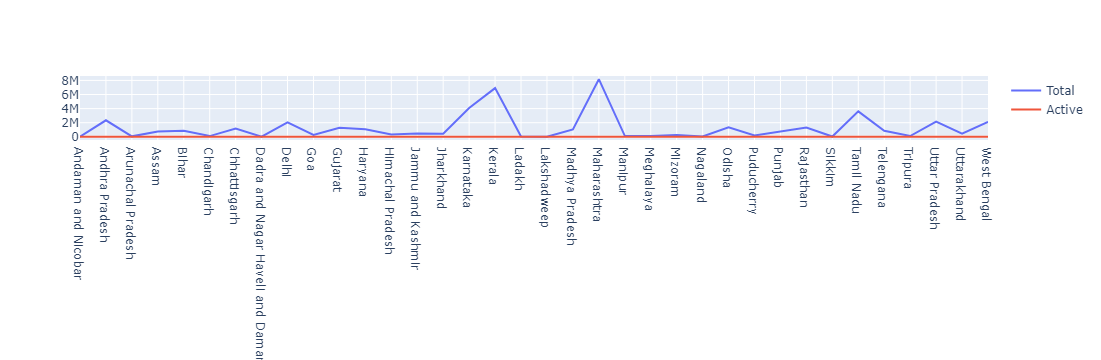

In [38]:
x = cd['State/UTs'].values
y1 = cd['Total Cases'].values
y2 = cd['Active'].values

fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y1,name="Total"))
fig.add_trace(go.Scatter(x=x,y=y2,name="Active"))
fig.show()

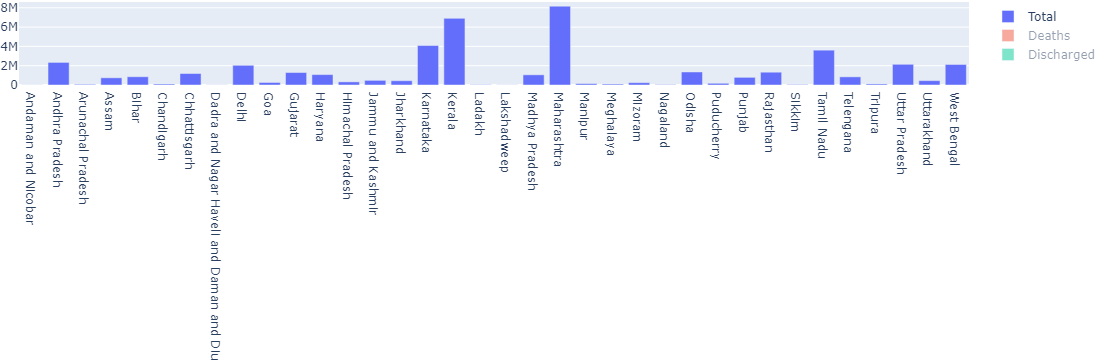

In [39]:
x = cd['State/UTs'].values
y1 = cd['Total Cases'].values
y2 = cd['Deaths'].values
y3 = cd['Discharged'].values

fig=go.Figure()

fig.add_trace(go.Bar(x=x,y=y1,name="Total"))
fig.add_trace(go.Bar(x=x,y=y2,name="Deaths"))
fig.add_trace(go.Bar(x=x,y=y2,name="Discharged"))

fig.update_layout(
    height=900,
    margin=dict(l=0,r=0,t=0,b=0)
)
fig.show()

In [36]:
cd.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

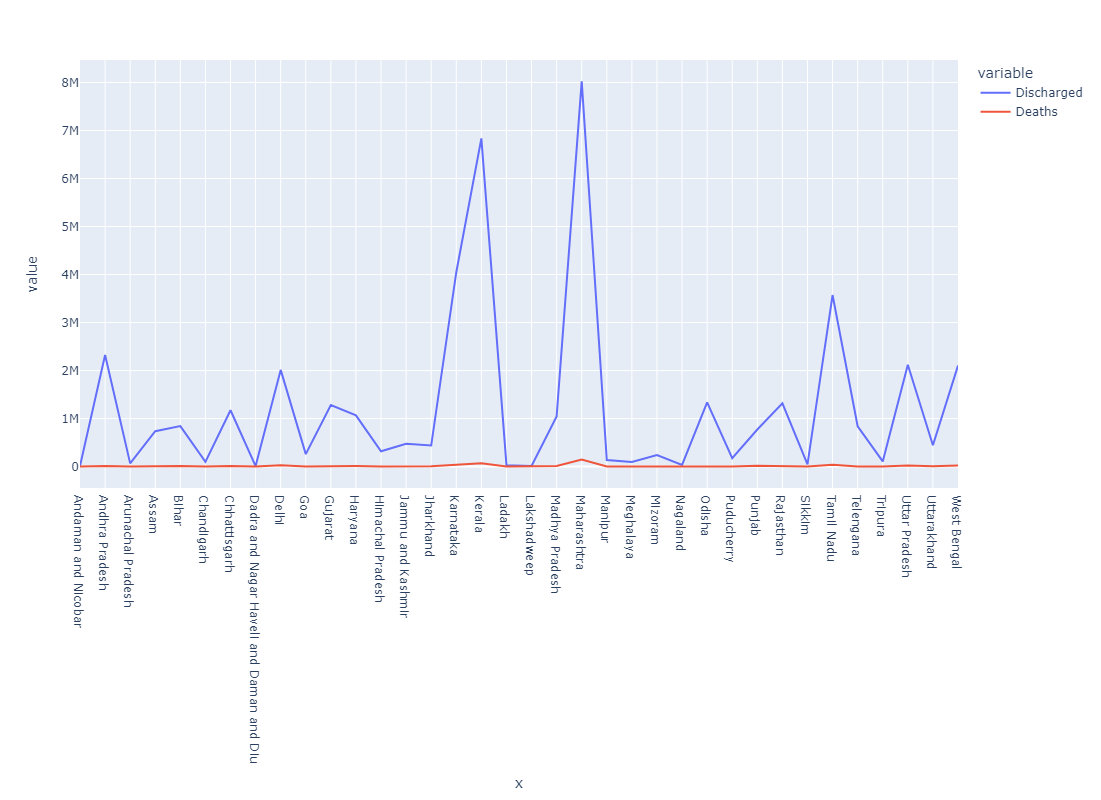

In [35]:
fig = px.line(cd,
             x=cd['State/UTs'].values,
             y=cd.columns[3:5],
             height=800,
             width=1000)
fig.show()

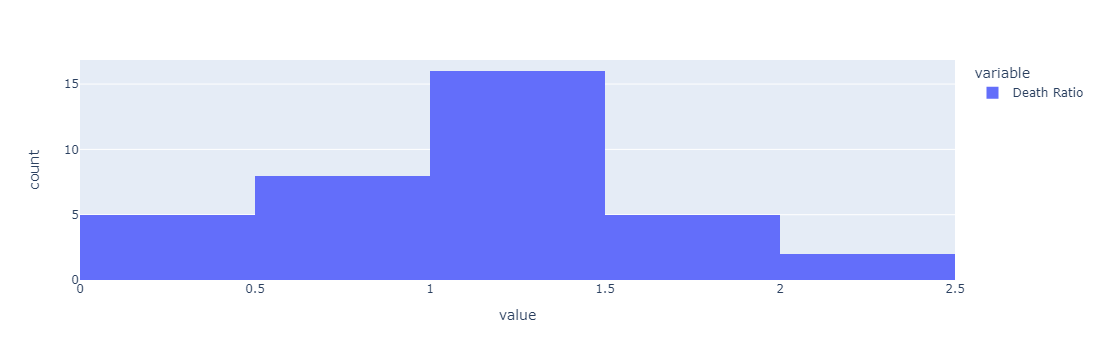

In [57]:
px.histogram(cd['Death Ratio'])

In [58]:
cd[['State/UTs','Population','Total Cases']].sort_values(by='Population',ascending=False)

,State/UTs,Population,Total Cases
7,Dadra and Nagar Haveli and Daman and Diu,231502578,11592
1,Andhra Pradesh,128500364,2340676
14,Jharkhand,124904071,443826
0,Andaman and Nicobar,100896618,10766
16,Kerala,91702478,6907241
34,Uttarakhand,85002417,452571
29,Sikkim,83697770,44927
22,Meghalaya,79502477,96983
10,Gujarat,70400153,1291383
31,Telengana,69599762,844432


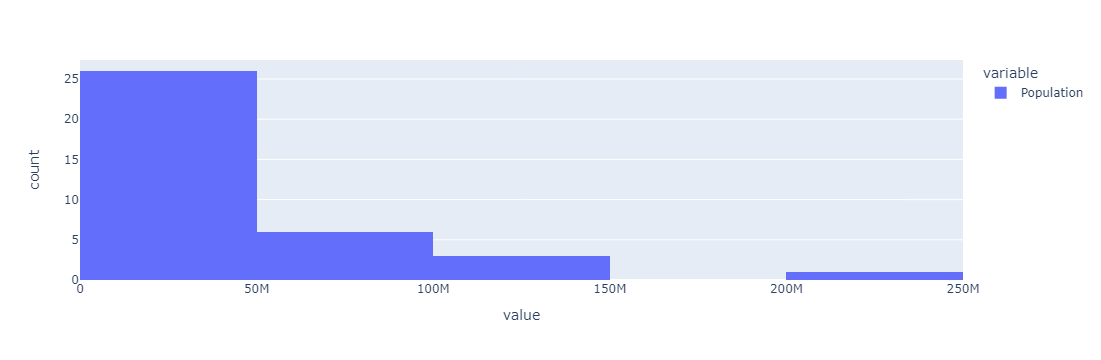

In [59]:
px.histogram(cd['Population'])

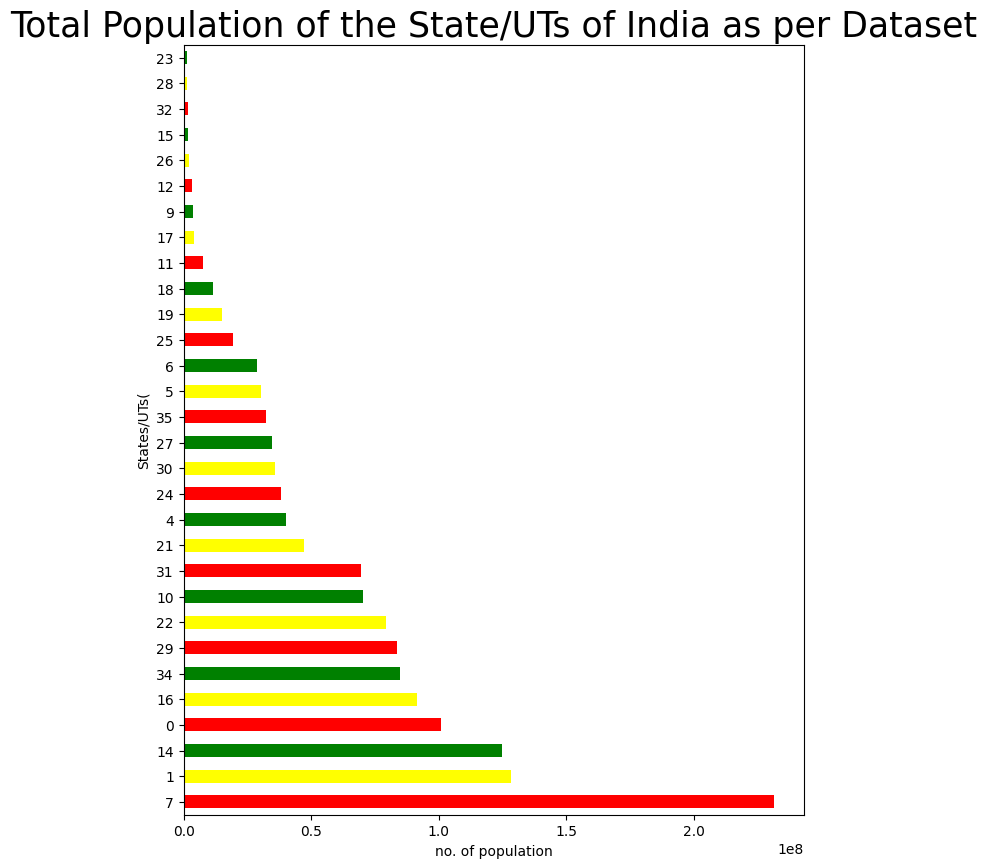

In [10]:
plt.figure(figsize=(8,10))
cd['Population'].sort_values(ascending=False)[:30].plot(kind='barh',color=['red','yellow','green'])
plt.title('Total Population of the State/UTs of India as per Dataset',fontsize=25)
plt.xlabel('no. of population')
plt.ylabel('States/UTs')
plt.show()

In [86]:
cd['Population'].sort_values(ascending=False,)


State/UTs
Dadra and Nagar Haveli and Daman and Diu    231502578
Andhra Pradesh                              128500364
Jharkhand                                   124904071
Andaman and Nicobar                         100896618
Kerala                                       91702478
Uttarakhand                                  85002417
Sikkim                                       83697770
Meghalaya                                    79502477
Gujarat                                      70400153
Telengana                                    69599762
Manipur                                      47099270
Bihar                                        40100376
Nagaland                                     38157311
Tamil Nadu                                   35998752
Punjab                                       34698876
West Bengal                                  32199722
Chandigarh                                   30501026
Chhattisgarh                                 28900667
Odisha            

In [40]:
df=pd.read_csv("C:/Users/adity/Downloads/COVID-19 India Statewise Vaccine Data.csv")

In [41]:
df.head()

,State,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364


In [42]:
df.columns

Index(['State', 'Total Vaccination Doses', 'Dose1', 'Dose 2', 'Dose 1 15-18',
       'Dose 2 15-18', 'Dose 1 12-14', 'Dose 2 12-14', 'Precaution 18-59',
       'Population'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State                    36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose1                    36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Dose 1 15-18             36 non-null     int64 
 5   Dose 2 15-18             36 non-null     int64 
 6   Dose 1 12-14             36 non-null     int64 
 7   Dose 2 12-14             36 non-null     int64 
 8   Precaution 18-59         36 non-null     int64 
 9   Population               36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


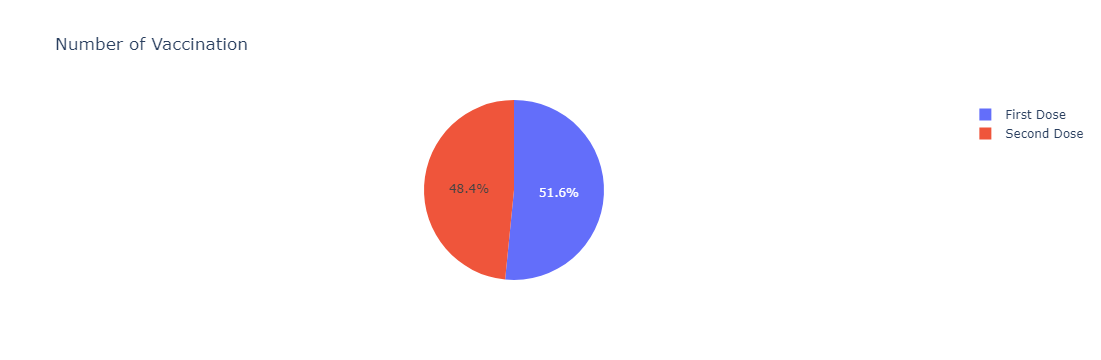

In [101]:
f_dose = df['Dose1'].sum()
s_dose = df['Dose 2'].sum()
f_dose, s_dose
px.pie(names=['First Dose', 'Second Dose'], values=[f_dose,s_dose], title="Number of Vaccination")

In [98]:
df.rename(columns={'Total Vaccination Doses' : 'Total'}, inplace=True)
df.head()

,State,Total,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364


In [97]:
max_vacc= df.groupby("State")["Total"].sum().to_frame('Total')
max_vacc= max_vacc.sort_values("Total", ascending=False)
max_vacc["Total"]=max_vacc["Total"].astype('int64')
max_vacc

,Total
State,
Uttar Pradesh,392011174
Maharashtra,177977996
Bihar,157293015
West Bengal,156100370
Madhya Pradesh,133940196
Gujarat,128105565
Tamil Nadu,127533904
Karnataka,122152396
Rajasthan,115721511


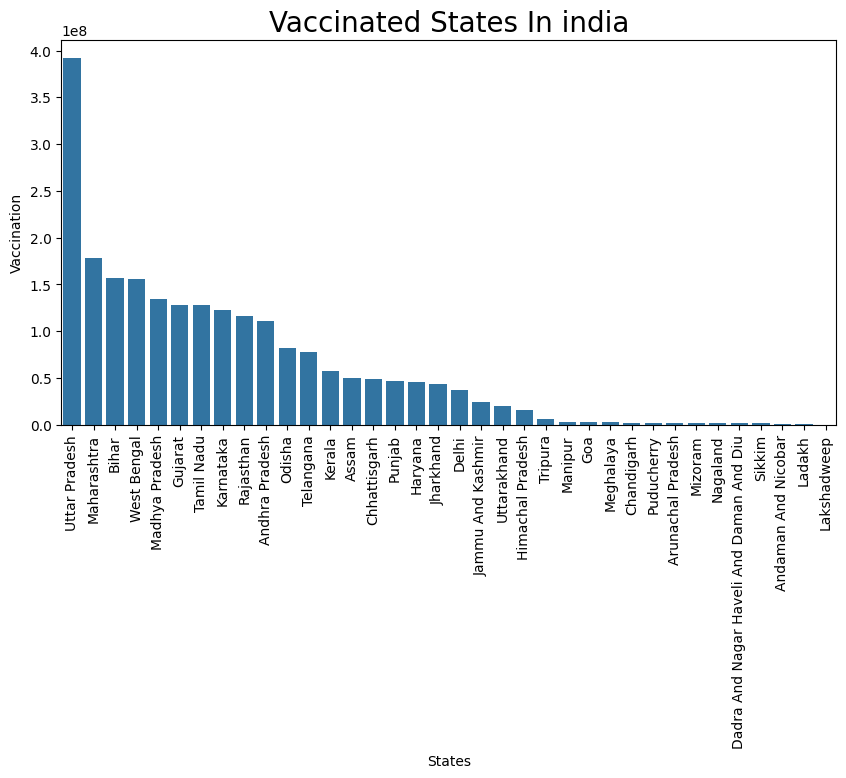

In [81]:
fig = plt.figure(figsize=(10,5))
plt.title("Vaccinated States In india",size = 20)
x = sns.barplot(data = max_vacc.iloc[:36],y = max_vacc.Total , x = max_vacc.index, linewidth = 1)
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel("Vaccination")
plt.show()

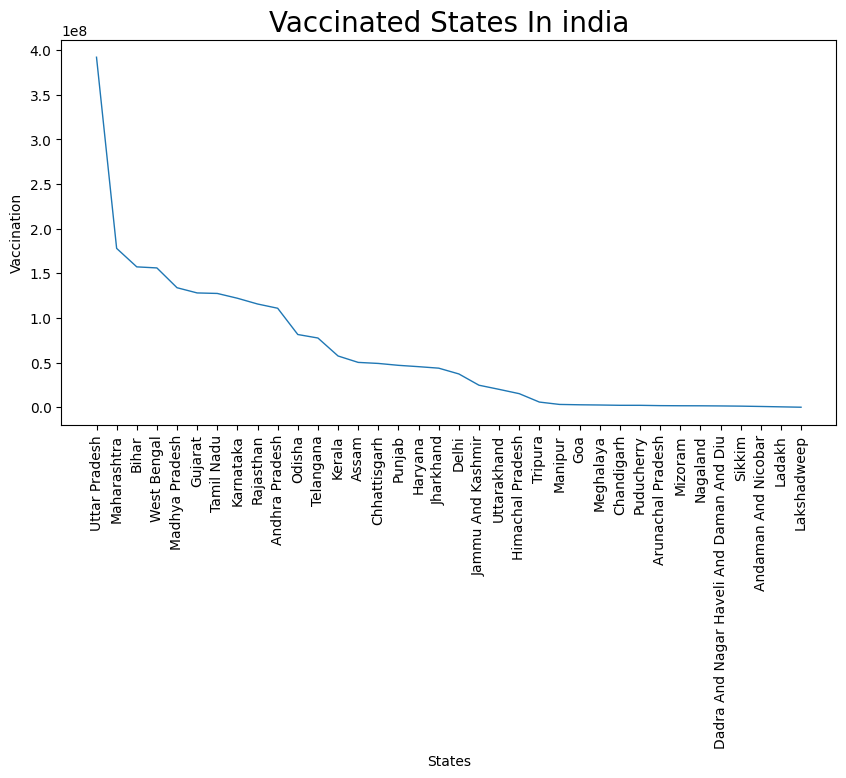

In [106]:
fig = plt.figure(figsize=(10,5))
plt.title("Vaccinated States In india",size = 20)
x = sns.lineplot(data = max_vacc.iloc[:36],y = max_vacc.Total, x = max_vacc.index, linewidth = 1)
plt.xlabel('States')
plt.xticks(rotation=90)
plt.ylabel("Vaccination")
plt.show()